Daten geladen:
   Feature1  Feature2  Target
0        48        72      48
1       100        84      60
2        64        42       0
3        24        57      16
4        73        71      32
Die Vorhersagen wurden erfolgreich zu 'predictions.csv' hinzugefügt.
df_small grouped:    variable  upper_bound_left levels_left   pleft  pright
0  Feature1              22.0     default -1.2246  0.4082
1  Feature1              58.0     default -1.4405  2.2532
2  Feature2              60.5     default  0.4030 -0.6304
df_small grouped:    variable  upper_bound_left levels_left   pleft  pright
0  Feature1               6.0     default -0.6433  0.0795
1  Feature1              22.0     default -1.2246  0.4082
2  Feature1              37.5     default -0.3196  0.2315
3  Feature1              58.0     default -1.2261  1.9179
4  Feature1              90.5     default -0.1635  0.7984
5  Feature2              60.5     default  0.4030 -0.6304
df_small grouped:    variable  upper_bound_left levels_left   

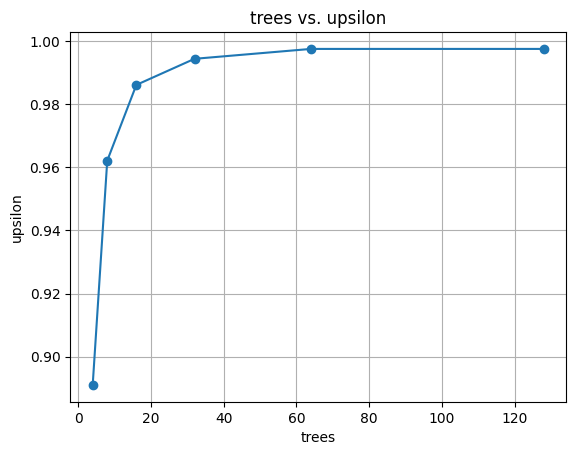

In [1]:
# Benötigte Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import xgrove as xg

# Schritt 1: CSV-Datei einlesen (Daten aus der bestehenden Datei)
data_path = "../models/generated_data.csv"
data = pd.read_csv(data_path)

# Anzeige der ersten Zeilen, um sicherzustellen, dass die Daten korrekt geladen wurden
print("Daten geladen:")
print(data.head())

# Schritt 2: Lineares Regressionsmodell erstellen
X = data[['Feature1', 'Feature2']]  # Unabhängige Variablen
y = data['Target']  # Zielvariable

# Modell erstellen und trainieren
lm_model = LinearRegression()
lm_model.fit(X, y)

# Anzeige der Koeffizienten und des Intercepts
# print(f"Koeffizienten: {lm_model.coef_}")
# print(f"Intercept: {lm_model.intercept_}")

# Schritt 3: Vorhersage mit dem Modell machen
predictions_lm_new = lm_model.predict(X)

# Die bestehende CSV-Datei einlesen
predictions_df = pd.read_csv('../models/predictions.csv', dtype={'predicted_tar_lm': np.float64})

# Vorhersagen für lm_model als neue Spalte hinzufügen
predictions_df['predicted_tar_py'] = predictions_lm_new

# Die aktualisierte Datei speichern (anfügen und nicht überschreiben)
predictions_df.to_csv('../models/predictions.csv', index=False)  # Maximale Genauigkeit von 16 Dezimalstellen

# Bestätigung der Speicherung
print("Die Vorhersagen wurden erfolgreich zu 'predictions.csv' hinzugefügt.")

# Schritt 4: Berechnung der durchschnittlichen Abweichung
# abweichung = np.mean(np.abs(y - predictions_lm_new))
# print(f"Durchschnittliche Abweichung: {abweichung}")

grove = xg.grove(data = data.drop("Target", axis=1), seed=42, model=lm_model)
grove.calculateGrove()
grove.get_result()
grove.plot_xgrove()



In [2]:
import numpy as np
import pandas as pd
import statistics
from scipy.stats import pearsonr

# Simulierte Testdaten
surrTar = np.array([3, 2, 7, 8, 1])  # tatsächliche Zielwerte
pexp = np.array([2.8, 2.1, 6.9, 8.1, 1.2])  # Vorhersagen des Modells

# Berechnung von ASE und ASE0
ASE = np.mean((surrTar - pexp) ** 2)
ASE0 = np.mean((surrTar - np.mean(surrTar)) ** 2)

# Berechnung von Upsilon
upsilon = 1 - ASE / ASE0

# Korrelation
# correlation = np.corrcoef(surrTar, pexp)[0, 1]
correlation, _ = pearsonr(surrTar, pexp)

print(f"ASE: {ASE}")
print(f"ASE0: {ASE0}")
print(f"Upsilon: {upsilon}")
print(f"Correlation: {correlation}")


ASE: 0.021999999999999985
ASE0: 7.760000000000001
Upsilon: 0.9971649484536083
Correlation: 0.998665120881617


In [3]:
# import pandas as pd
# from pypmml import Model  # Importiere pypmml für das Modell
# import xgrove.grove as grove

# # Definiere den PMML-Dateipfad und den CSV-Datenpfad
# pmml_path = "../models/linear_model.pmml"
# data_path = "../models/generated_data.csv"

# # Lade das trainierte PMML-Modell (aus R gespeichert)
# pmml_model = Model.load(pmml_path)  # Laden des trainierten Modells

# # Lade die Eingabedaten aus der CSV-Datei
# input_data = pd.read_csv(data_path)

# # Entferne die Zielvariable 'Target' aus den Eingabedaten
# target = input_data["Target"]
# input_data = input_data.drop(columns=["Target"])

# # Erstelle ein grove-Objekt mit dem geladenen Modell und den bearbeiteten Eingabedaten
# grove_instance = grove(model=pmml_model, 
#                        data=input_data, 
#                        b_frac=1,  
#                        tar = target, 
#                        seed=42)

# # Führe die Berechnung durch
# grove_instance.calculateGrove()

# # Beispielwerte der Mittelwerte und Standardabweichungen (ersetzen durch die aus R exportierten Werte)
# means_r = [input_data.iloc[0], input_data.iloc[1]]  # Ersetze durch die Mittelwerte der Spalten aus R
# sds_r = [input_data.iloc[0], input_data.iloc[1]]     # Ersetze durch die Standardabweichungen der Spalten aus R

# # Skalierung der Daten in Python
# input_data_scaled = (input_data - means_r) / sds_r

# # Ausgabe des Resultats und der Explanation
# # print("Result:")
# # print(grove_instance.result)

# print("\nExplanation:")
# print(grove_instance.explanation)


First Try

In [4]:
# # Benötigte Bibliotheken importieren
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Schritt 1: CSV-Datei einlesen (Daten aus der bestehenden Datei)
# data_path = "../models/generated_data.csv"
# data = pd.read_csv(data_path)

# # Anzeige der ersten Zeilen, um sicherzustellen, dass die Daten korrekt geladen wurden
# print("Daten geladen:")
# print(data.head())

# # Schritt 2: Lineares Regressionsmodell erstellen
# X = data[['Feature1', 'Feature2']]  # Unabhängige Variablen
# y = data['Target']  # Zielvariable

# # Modell erstellen und trainieren
# lm_model = LinearRegression()
# lm_model.fit(X, y)

# # Anzeige der Koeffizienten und des Intercepts
# print(f"Koeffizienten: {lm_model.coef_}")
# print(f"Intercept: {lm_model.intercept_}")

# # Schritt 3: Vorhersage mit dem Modell machen
# predictions = lm_model.predict(X)

# # Schritt 4: Berechnung der durchschnittlichen Abweichung
# abweichung = np.mean(np.abs(y - predictions))
# print(f"Durchschnittliche Abweichung: {abweichung}")


In [5]:
# import pandas as pd
# import numpy as np
# import statistics
# from xgboost import XGBRegressor, DMatrix
# import xgboost as xgb
# import json

# class grove():
#     def __init__(self, 
#                  model, 
#                  data: pd.DataFrame,
#                  ntrees: np.array = np.array([4, 8, 16, 32, 64, 128]), 
#                  pfun=None, 
#                  shrink: float = 1, 
#                  b_frac: float = 1, 
#                  seed: int = 42,
#                  grove_rate: float = 1,
#                  trained: bool = False,
#                  tar=None):
#         self.model = model
#         self.data = self.encodeCategorical(data)
#         self.ntrees = ntrees
#         self.pfun = pfun
#         self.shrink = shrink
#         self.b_frac = b_frac
#         self.seed = seed
#         self.grove_rate = grove_rate
#         self.trained = trained
#         self.tar = tar
#         self.surrTar = self.getSurrogateTarget(pfun=self.pfun, tar=self.tar)
#         self.surrGrove = self.getGBM()
#         self.predictions = []
#         self.explanation = []
#         self.groves = []
#         self.rules = []
#         self.result = []

#     def encodeCategorical(self, data):
#         categorical_columns = data.select_dtypes(include=['object', 'category']).columns
#         return pd.get_dummies(data, columns=categorical_columns)

#     def getSurrogateTarget(self, pfun, tar):
#         if tar is None:
#             return self.model.predict(self.data) if self.pfun is None else pfun(model=self.model, data=self.data)
#         else:
#             return tar

#     def getGBM(self):
#         params = {
#             'objective': 'reg:squarederror',  # Ziel für Regression (quadratische Fehler)
#             'max_depth': 1,                   # Maximale Baumtiefe
#             'eta': self.shrink,               # Lernrate (Shrinkage)
#             'eval_metric': 'rmse',            # Evaluierungsmetrik (Root Mean Squared Error)
#             'subsample': self.b_frac,         # Anteil der Trainingsdaten, der verwendet wird
#             'random_state': self.seed         # Zufallsgenerator-Seed
#         }

#         # XGBRegressor mit den definierten Parametern
#         grove = XGBRegressor(
#             n_estimators=int(max(self.ntrees)),  # Anzahl der Bäume
#             **params  # Übergibt das Dictionary mit den Parametern
#         )
#         grove.fit(self.data, self.surrTar)

        
#         # if np.array_equal(np.array(self.surrTar), np.array(self.model.predict(self.data))):
#         #     print("HALLELUJA ITS THE SAME")
#         # else:
#         #     print(f"given target: {self.tar}")
#         #     print(f"generated target: {self.model.predict(self.data)}")
#         return grove
    
#     def upsilon(self, pexp):
#         surrTar_series = pd.Series(self.surrTar)
#         pexp_series = pd.Series(pexp)
#         print(f"pexp: {pexp}")
#         ASE = statistics.mean((surrTar_series - pexp_series) ** 2)
#         ASE0 = statistics.mean((surrTar_series - statistics.mean(surrTar_series)) ** 2)
#         ups = 1 - ASE / ASE0
#         rho = surrTar_series.corr(pexp_series)
#         return ups, rho

#     def get_result(self):
#         return [self.explanation, self.rules, self.groves, self.model]
    
#     # def consolidate_rules(self, df_small):
#     #         # Zugriff auf self.rules und self.data (Daten müssen vorhanden sein)
#     #         data = self.data  
#     #         i = 1
#     #         while i < len(df_small):
#     #             drop_rule = False
#     #             # Überprüfen, ob der Datentyp der Spalte numerisch ist
#     #             if pd.api.types.is_numeric_dtype(data[df_small.iloc[i]["variable"]]):
#     #                 for j in range(i):
#     #                     # Überprüfen, ob die Variable und die Obergrenze gleich sind
#     #                     if df_small.iloc[i]["variable"] == df_small.iloc[j]["variable"]:
#     #                         if df_small.iloc[i]["upper_bound_left"] == df_small.iloc[j]["upper_bound_left"]:
#     #                             # Berechnung der crosstab-Tabelle
#     #                             v1 = data[df_small.iloc[i]["variable"]] <= df_small.iloc[i]["upper_bound_left"]
#     #                             v2 = data[df_small.iloc[j]["variable"]] <= df_small.iloc[j]["upper_bound_left"]
#     #                             tab = pd.crosstab(v1, v2)
                                
#     #                             # Überprüfen, ob alle Werte in der Diagonalen übereinstimmen
#     #                             if tab.to_numpy().diagonal().sum() == tab.sum().sum():
#     #                                 # Konsolidierung der Werte in den Spalten 'pleft' und 'pright'
#     #                                 df_small.at[j, "pleft"] += df_small.at[i, "pleft"]
#     #                                 df_small.at[j, "pright"] += df_small.at[i, "pright"]
#     #                                 drop_rule = True
#     #                                 break

#     #             # Löschen der redundanten Regel
#     #             if drop_rule:
#     #                 df_small = df_small.drop(i).reset_index(drop=True)
#     #             else:
#     #                 i += 1

#     #         return df_small
    
#     def extract_rules(self, booster_json):
#         rules = []  # Liste, die alle getrennten Regelsets speichert

#         # Iteriere durch die ntrees_list und hole die Regeln für jeden Baum-Index
#         for nt in self.ntrees:
#             tree_rules = []  # Hier speichern wir die Regeln für den aktuellen Wert von nt
            
#             # Iteriere durch alle Bäume im booster_json
#             for index, tree in enumerate(booster_json, start=1):  # start=1 sorgt dafür, dass der Baumindex bei 1 beginnt
#                 # print(f"DEBUG: Baum {index} - Typ von tree: {type(tree)}")  # Gib den Typ des Baums aus
                
#                 # print(tree)
#                 if isinstance(tree, dict):
#                     # print(tree)
#                     if 'children' in tree:
#                         # print(f"DEBUG: Baum {index} : {tree}")
#                         # print(f"DEBUG: Baum {index} und sein split: {tree['split']}")
#                         # print(f"DEBUG: Baum {index} hat 'children': {tree['children']}")  # Zeige die Kinder des Baums an
#                         # Jeden Split in den Kindern durchgehen und Regel extrahieren
                        
#                         # print(f"split_node: {split_node}")

#                         left_value = None
#                         right_value = None

#                     # Gehe durch die Kindknoten und finde die Blattwerte
#                         for child in tree['children']:
#                             if 'leaf' in child:
#                                 if child['nodeid'] == tree['yes']:  # Prüfe, ob dies der "yes"-Pfad ist
#                                     left_value = round(child['leaf'], 4)
#                                     # print(f"DEBUG: Left leaf gefunden - Wert: {left_value}")
#                                 elif child['nodeid'] == tree['no']:  # Prüfe, ob dies der "no"-Pfad ist
#                                     right_value = round(child['leaf'],4)
#                                     # print(f"DEBUG: Right leaf gefunden - Wert: {right_value}")
                        
#                             rule = {
#                                 'variable': tree.get('split', None),
#                                 'threshold': tree.get('split_condition', None),
#                                 'pleft': left_value,
#                                 'pright': right_value
#                             }
#                         tree_rules.append(rule)
#                     else:
#                         print(f"DEBUG: Baum {index} hat keine 'children'.")  # Wenn keine 'children' da sind
#                 else:
#                     print(f"DEBUG: Baum {index} ist kein Dictionary, sondern: {type(tree)}")  # Baum ist kein dict

#                 # Wenn der aktuelle Baum-Index die Anzahl von `nt` überschreitet, beende den Loop
#                 if index >= nt:
#                     break  # Wir haben genug Bäume extrahiert, also abbrechen
            
#             # Füge die extrahierten Regeln für diesen `nt`-Wert zur Gesamtregel-Liste hinzu
#             print(f"tree_rules {index}: {len(tree_rules)}")
#             rules.append(tree_rules)
#         outer_shape = len(rules)

#         # Anzahl der inneren Listen
#         inner_shapes = [len(inner) for inner in rules]
#         print(f"all the Rules: {rules}")
        
#         return rules


#     def calculateGrove(self):
#         explanation = []
#         cumulative_rules_list = []
#         data = self.data
#         dtrain = xgb.DMatrix(data=data, label=self.surrTar)
#         # cumulative_rules = pd.DataFrame()
#         booster = self.surrGrove.get_booster()
#         tree_json = booster.trees_to_dataframe()
#         booster_json = booster.get_dump(dump_format="json")
#         parsed_trees = [json.loads(tree) for tree in booster_json]
#         # print(f"boosterjson: {booster_json}")
#         # print(f"parsed_trees: {parsed_trees}")
#         tree1 = booster[0].get_dump(with_stats = True)[0]
        
#         # print(f"tree1 = {tree1}")
        
#         # for node in tree_json[tree_json['Tree'] == 0].itertuples():
#         #     print(f"Node ID: {node.ID}, Feature: {node.Feature}, Split: {node.Split}, "
#         #         f"Gain: {node.Gain}, Cover: {node.Cover}")
            
#         cumulative_rules_list = self.extract_rules(parsed_trees)
        
#         rules_df = pd.DataFrame()
#         # print(f"rules_df: {rules_df}")
        
#         for nt in self.ntrees:
#             # Berechnung von Vorhersagen, Upsilon und Korrelation
#             predictions = booster.predict(dtrain, nt)
#             upsilon, rho = self.upsilon(pexp=predictions)

#             # Initialisierung von temporären Variablen
#             vars_temp, splits_temp, csplits_left_temp, pleft_temp, pright_temp = [], [], [], [], []

#             # Verarbeitung der Regeln aus cumulative_rules
#             for rule_set in cumulative_rules_list:
#                 for entry in rule_set:
#                     var_name = entry['variable']
#                     threshold = entry["threshold"]
#                     pleft = entry["pleft"]
#                     pright = entry["pright"]
#                     vars_temp.append(var_name)

#                     if pd.api.types.is_string_dtype(data[var_name]):
#                         levels = data[var_name].unique()
#                         csplits_left_temp.append(" | ".join(map(str, levels)))
#                         splits_temp.append("")
#                     else:
#                         splits_temp.append(threshold)
#                         csplits_left_temp.append(pd.NA)
                    
#                     pleft_temp.append(pleft)
#                     pright_temp.append(pright)

#             # Erstellen des DataFrame für Regeln
#             df = pd.DataFrame({
#                 "variable": vars_temp,
#                 "upper_bound_left": splits_temp,
#                 "levels_left": csplits_left_temp,
#                 "pleft": pleft_temp,
#                 "pright": pright_temp
#             })

#             # Hinzufügen eines Intercept-Eintrags
#             intercept_df = pd.DataFrame({
#                 "variable": ["Intercept"],
#                 "upper_bound_left": [pd.NA],
#                 "levels_left": [pd.NA],
#                 "pleft": [self.surrGrove.predict(data.iloc[[0]])[0]],
#                 "pright": [self.surrGrove.predict(data.iloc[[0]])[0]]
#             })

#             # Konsolidierung und Gruppierung der Regeln
#             df = pd.concat([intercept_df, df], ignore_index=True)
#             # df = df.dropna(subset=["upper_bound_left", "levels_left"], how="any")
#             df_small = df.groupby(["variable", "upper_bound_left", "levels_left"], as_index=False).agg({
#                 "pleft": "sum",
#                 "pright": "sum"
#             })

#             # Debugging-Ausgabe
#             print(f"DEBUG: Konsolidierte Regeln für nt={nt} Bäume:\n{df_small.head()}")

#             # Ergebnis sammeln
#             explanation.append({
#                 "trees": nt,
#                 "rules": len(df_small),
#                 "upsilon": upsilon,
#                 "cor": rho
#             })
#             self.rules.append(df_small)

#         # Zusammenfassen der Ergebnisse
#         self.explanation = pd.DataFrame(explanation)
#         self.groves = rules_df
#         self.result = self.get_result()
#         print("DEBUG: Berechnung abgeschlossen. Ergebnisdaten verfügbar.")



In [ ]:
# import pandas as pd
# import numpy as np
# import statistics
# from xgboost import XGBRegressor, DMatrix
# import xgboost as xgb
# import json

# class grove:
#     def __init__(self, 
#                  model, 
#                  data: pd.DataFrame,
#                  ntrees: np.array = np.array([4, 8, 16, 32, 64, 128]), 
#                  pfun=None, 
#                  shrink: float = 1, 
#                  b_frac: float = 1, 
#                  seed: int = 42,
#                  grove_rate: float = 1,
#                  trained: bool = False,
#                  tar=None):
#         self.model = model
#         self.data = self.encodeCategorical(data)
#         self.ntrees = ntrees
#         self.pfun = pfun
#         self.shrink = shrink
#         self.b_frac = b_frac
#         self.seed = seed
#         self.grove_rate = grove_rate
#         self.trained = trained
#         self.tar = tar
#         self.surrTar = self.getSurrogateTarget(pfun=self.pfun, tar=self.tar)
#         self.surrGrove = self.getGBM()
#         self.predictions = []
#         self.explanation = []
#         self.groves = []
#         self.rules = []
#         self.result = []

#     def encodeCategorical(self, data):
#         categorical_columns = data.select_dtypes(include=['object', 'category']).columns
#         return pd.get_dummies(data, columns=categorical_columns)

#     def getSurrogateTarget(self, pfun, tar):
#         if tar is None:
#             return self.model.predict(self.data) if self.pfun is None else pfun(model=self.model, data=self.data)
#         else:
#             return tar
    
#     def get_result(self):
#         return [self.explanation, self.rules, self.groves, self.model]

#     def getGBM(self):
#         params = {
#             'objective': 'reg:squarederror',  
#             'max_depth': 1,                   
#             'eta': self.shrink,               
#             'eval_metric': 'rmse',            
#             'subsample': self.b_frac,         
#             'random_state': self.seed,
#             'gamma': 0         
#         }

#         grove = XGBRegressor(
#             n_estimators=int(max(self.ntrees)),  
#             **params
#         )
#         grove.fit(self.data, self.surrTar)
#         return grove
    
#     def upsilon(self, pexp):
#         surrTar_series = pd.Series(self.surrTar)
#         pexp_series = pd.Series(pexp)
#         ASE = statistics.mean((surrTar_series - pexp_series) ** 2)
#         ASE0 = statistics.mean((surrTar_series - statistics.mean(surrTar_series)) ** 2)
#         ups = 1 - ASE / ASE0
#         rho = surrTar_series.corr(pexp_series)
#         return ups, rho

#     def extract_rules(self, booster_json):
#         rules = []
#         for nt in self.ntrees:
#             tree_rules = []
#             for index, tree in enumerate(booster_json, start=1):
#                 if isinstance(tree, dict) and 'children' in tree:
#                     left_value, right_value = None, None
#                     for child in tree['children']:
#                         if 'leaf' in child:
#                             if child['nodeid'] == tree['yes']:
#                                 left_value = round(child['leaf'], 4)
#                             elif child['nodeid'] == tree['no']:
#                                 right_value = round(child['leaf'], 4)
#                     rule = {
#                         'variable': tree.get('split', None),
#                         'threshold': tree.get('split_condition', None),
#                         "levels_left": None,
#                         'pleft': left_value,
#                         'pright': right_value
#                     }
#                     tree_rules.append(rule)
#                 if index >= nt:
#                     break
#             rules.append(tree_rules)
#         return rules

#     def remove_redundant_rules(self, df_small, data):
#         """
#         Entfernt redundante Regeln aus dem DataFrame df_small basierend auf denselben Variablen und Trennbedingungen.
        
#         Args:
#             df_small (pd.DataFrame): DataFrame mit Regeldefinitionen.
#             data (pd.DataFrame): Original-Datensatz, um Variablenbedingungen zu überprüfen.
        
#         Returns:
#             pd.DataFrame: Aktualisiertes df_small ohne redundante Regeln.
#         """
#         if len(df_small) > 1:
#             i = 1  # Start mit der zweiten Regel (Index in Python ist 0-basiert)

#             while i < len(df_small):
#                 drop_rule = False
#                 # Überprüfen, ob die Variable numerisch ist
#                 if pd.api.types.is_numeric_dtype(data[df_small.loc[i, "variable"]]):
#                     for j in range(i):
#                         # Wenn dieselbe Variable betroffen ist
#                         if df_small.loc[i, "variable"] == df_small.loc[j, "variable"]:
#                             v1 = data[df_small.loc[i, "variable"]] <= df_small.loc[i, "threshold"]
#                             v2 = data[df_small.loc[j, "variable"]] <= df_small.loc[j, "threshold"]
#                             tab = pd.crosstab(v1, v2)
                            
#                             if tab.to_numpy().trace() == tab.to_numpy().sum():
#                                 df_small.loc[j, "pleft"] += df_small.loc[i, "pleft"]
#                                 df_small.loc[j, "pright"] += df_small.loc[i, "pright"]
#                                 drop_rule = True

#                 # Regel entfernen oder zum nächsten Eintrag gehen
#                 if drop_rule:
#                     df_small = df_small.drop(index=i).reset_index(drop=True)
#                 else:
#                     i += 1

#         return df_small


#     def calculateGrove(self):
#         explanation = []
#         data = self.data
#         dtrain = xgb.DMatrix(data=data, label=self.surrTar)
#         booster = self.surrGrove.get_booster()
#         booster_json = booster.get_dump(dump_format="json")
#         parsed_trees = [json.loads(tree) for tree in booster_json]
#         cumulative_rules_list = self.extract_rules(parsed_trees)
        
#         for nt in self.ntrees:
#             predictions = booster.predict(dtrain, iteration_range=(0, nt))
#             upsilon, rho = self.upsilon(pexp=predictions)
#             df_small_list = []  # Liste für die bereinigten DataFrames
            
#             for i in range(len(cumulative_rules_list)):
#                 intercept_df = pd.DataFrame({
#                     "variable": ["Intercept"],
#                     "threshold": [None],
#                     "levels_left": [None],
#                     "pleft": [self.surrGrove.predict(data.iloc[[0]])[0]],
#                     "pright": [self.surrGrove.predict(data.iloc[[0]])[0]]
#                 })
#                 df = pd.DataFrame(cumulative_rules_list[i])
#                 df = pd.concat([intercept_df, df], ignore_index=True)
                
#                 # redundante Regeln entfernen
#                 df_cleaned = self.remove_redundant_rules(df, data)
#                 df_small_list.append(df_cleaned)
#             print(f"df_small_list: {df_small_list}")
#             # Alle DataFrames in df_small_list zusammenführen
#             if df_small_list:  # Prüfen, ob Liste nicht leer ist
#                 df_small = pd.concat(df_small_list, ignore_index=True)
#             else:
#                 df_small = pd.DataFrame()  # Leerer DataFrame, falls keine Daten
            
#             if "levels_left" in df_small.columns:
#                 df_small["levels_left"] = df_small["levels_left"].apply(lambda x: str(x) if isinstance(x, list) else x)

#             # Gruppieren und Aggregieren
#             if not df_small.empty:
#                 df_small = df_small.groupby(["variable", "threshold", "levels_left"], as_index=False).agg({
#                     "pleft": "sum",
#                     "pright": "sum"
#                 })
#             if not df_small.empty:
#                 num_rules = len(df_small)  # Anzahl der nicht-redundanten Regeln
#             else:
#                 num_rules = 0  # Falls df_small leer ist

#             explanation.append({
#                 "trees": nt,
#                 "rules": num_rules,
#                 "upsilon": upsilon,
#                 "cor": rho
#             })
#             # Hinzufügen der Ergebnisse zur Erklärung
            
#             self.rules.append(df_small)

#         self.explanation = pd.DataFrame(explanation)
#         self.result = [self.explanation, self.rules, self.groves, self.model]
    
    
    # TODO Zählung fixen
    # def calculateGrove(self):
    #     explanation = []
    #     data = self.data
    #     dtrain = xgb.DMatrix(data=data, label=self.surrTar)
    #     booster = self.surrGrove.get_booster()
    #     booster_json = booster.get_dump(dump_format="json")
    #     parsed_trees = [json.loads(tree) for tree in booster_json]
    #     cumulative_rules_list = self.extract_rules(parsed_trees)
    #     df_small_list = []  # Liste für alle DataFrames mit bereinigten Regeln
    #     j=0
    #     for nt in self.ntrees:
            
    #         predictions = booster.predict(dtrain, iteration_range=(0, nt))
    #         upsilon, rho = self.upsilon(pexp=predictions)
            
    #         # Für jede Baumanzahl die Regeln und ihre Bereinigung durchführen
    #         df_small = pd.DataFrame()
            
    #         for i in range(len(cumulative_rules_list)):
    #             intercept_df = pd.DataFrame({
    #                 "variable": ["Intercept"],
    #                 "threshold": [None],
    #                 "levels_left": [None],
    #                 "pleft": [self.surrGrove.predict(data.iloc[[0]])[0]],
    #                 "pright": [self.surrGrove.predict(data.iloc[[0]])[0]]
    #             })
    #             df = pd.DataFrame(cumulative_rules_list[i])
    #             df = pd.concat([intercept_df, df], ignore_index=True)
                
    #             # Redundante Regeln entfernen und die bereinigte Liste anfügen
    #             df_cleaned = self.remove_redundant_rules(df, data)  # Dynamische Bereinigung pro Iteration
    #             if isinstance(df_small_list[j],None): 
    #                 df_small_list.append(pd.DataFrame({
    #                     "nt": [nt],
    #                     "rules": [df_cleaned]}, index=[j]))  # Liste aller bereinigten Regeln sammeln
            
    #         print(f"df_small_list: {df_small_list}")
    #         # Alle bereinigten DataFrames zusammenführen
    #         if df_small_list:
    #             df_small = pd.concat(df_small_list, ignore_index=True)
            
    #         df_small['levels_left'] = df_small['levels_left'].fillna('None')
    #         # Ersetze Listen durch 'None' oder einen anderen Platzhalter
    #         df_small['levels_left'] = df_small['levels_left'].apply(lambda x: 'None' if isinstance(x, list) else x)

    #         # Gruppieren und Aggregieren
    #         if not df_small.empty:
    #             df_small = df_small.groupby(["variable", "threshold", "levels_left"], as_index=False).agg({
    #                 "pleft": "sum",
    #                 "pright": "sum"
    #             })
            
    #         # Anzahl der nicht-redundanten Regeln
    #         num_rules = len(df_small)

    #         # Ergebnisse zur Erklärung hinzufügen
    #         explanation.append({
    #             "trees": nt,
    #             "rules": num_rules,  # Hier wird die Anzahl der nicht-redundanten Regeln gespeichert
    #             "upsilon": upsilon,
    #             "cor": rho
    #         })

    #         self.rules.append(df_small)
    #         j += 1

    #     self.explanation = pd.DataFrame(explanation)
    #     self.result = [self.explanation, self.rules, self.groves, self.model]


In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Beispiel-Daten erstellen
X = np.array([[1], [2], [3], [4]])
y = np.array([1.5, 3.5, 3.0, 5.0])

# GradientBoostingRegressor mit max_depth=3
gbr = GradientBoostingRegressor(n_estimators=1, max_depth=3, random_state=42)
gbr.fit(X, y)

# Zugriff auf den ersten Baum
first_tree = gbr.estimators_[0, 0].tree_

# Rekursive Funktion zur Darstellung der Baumstruktur
def print_tree_structure(tree, node_id=0, depth=0):
    indent = "  " * depth
    feature = tree.feature[node_id]
    threshold = tree.threshold[node_id]
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    print(f"{indent}Node {node_id}:")
    print(f"{indent}  Feature used for split: {feature if feature != -2 else 'Leaf node'}")
    print(f"{indent}  Threshold for split: {threshold if feature != -2 else 'N/A'}")
    print(f"{indent}  Value: {tree.value[node_id].flatten()[0]:.4f}")

    if left_child != -1:  # Wenn ein linker Kindknoten existiert
        print(f"{indent}  Left child node: {left_child}")
        print_tree_structure(tree, left_child, depth + 1)
    if right_child != -1:  # Wenn ein rechter Kindknoten existiert
        print(f"{indent}  Right child node: {right_child}")
        print_tree_structure(tree, right_child, depth + 1)

# Baumstruktur ausgeben
print("Tree Structure:")
print_tree_structure(first_tree)


Tree Structure:
Node 0:
  Feature used for split: 0
  Threshold for split: 1.5
  Value: 0.0000
  Left child node: 1
  Node 1:
    Feature used for split: Leaf node
    Threshold for split: N/A
    Value: -1.7500
  Right child node: 2
  Node 2:
    Feature used for split: 0
    Threshold for split: 3.5
    Value: 0.5833
    Left child node: 3
    Node 3:
      Feature used for split: 0
      Threshold for split: 2.5
      Value: 0.0000
      Left child node: 4
      Node 4:
        Feature used for split: Leaf node
        Threshold for split: N/A
        Value: 0.2500
      Right child node: 5
      Node 5:
        Feature used for split: Leaf node
        Threshold for split: N/A
        Value: -0.2500
    Right child node: 6
    Node 6:
      Feature used for split: Leaf node
      Threshold for split: N/A
      Value: 1.7500


In [7]:
# Benötigte Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import json

# Schritt 1: CSV-Datei einlesen (Daten aus der bestehenden Datei)
data_path = "../models/generated_data.csv"
data = pd.read_csv(data_path)

# Anzeige der ersten Zeilen, um sicherzustellen, dass die Daten korrekt geladen wurden
print("Daten geladen:")
print(data.head())

# Schritt 2: Lineares Regressionsmodell erstellen
X = data[['Feature1', 'Feature2']]  # Unabhängige Variablen
y = data['Target']  # Zielvariable

# Modell erstellen und trainieren
lm_model = LinearRegression()
lm_model.fit(X, y)

# Anzeige der Koeffizienten und des Intercepts
# print(f"Koeffizienten: {lm_model.coef_}")
# print(f"Intercept: {lm_model.intercept_}")

# Schritt 3: Vorhersage mit dem Modell machen
predictions_lm_new = lm_model.predict(X)

# Die bestehende CSV-Datei einlesen
predictions_df = pd.read_csv('../models/predictions.csv', dtype={'predicted_tar_lm': np.float64})

# Vorhersagen für lm_model als neue Spalte hinzufügen
predictions_df['predicted_tar_py'] = predictions_lm_new

# Die aktualisierte Datei speichern (anfügen und nicht überschreiben)
predictions_df.to_csv('../models/predictions.csv', index=False)  # Maximale Genauigkeit von 16 Dezimalstellen

# Bestätigung der Speicherung
print("Die Vorhersagen wurden erfolgreich zu 'predictions.csv' hinzugefügt.")

# Schritt 4: Berechnung der durchschnittlichen Abweichung
# abweichung = np.mean(np.abs(y - predictions_lm_new))
# print(f"Durchschnittliche Abweichung: {abweichung}")



xg = grove(data = data.drop("Target", axis=1), seed=42, model=lm_model)
xg.calculateGrove()
xg.get_result()



Daten geladen:
   Feature1  Feature2  Target
0        48        72      48
1       100        84      60
2        64        42       0
3        24        57      16
4        73        71      32
Die Vorhersagen wurden erfolgreich zu 'predictions.csv' hinzugefügt.
df_small_list: [    variable threshold levels_left      pleft     pright
0  Intercept      None        None  48.916519  48.916519
1   Feature1        59        None  -1.406700   2.174700
2   Feature1        28        None  -1.021800   0.502200
3   Feature2        61        None   0.387100  -0.612900,     variable threshold levels_left      pleft     pright
0  Intercept      None        None  48.916519  48.916519
1   Feature1        59        None  -1.186400   1.845200
2   Feature1        28        None  -1.021800   0.502200
3   Feature2        61        None   0.387100  -0.612900
4   Feature1         9        None  -0.876600   0.137600
5   Feature1        91        None  -0.140600   0.615200
6   Feature1        86        None 

[   trees  rules   upsilon       cor
 0      4      0  0.896764  0.947322
 1      8      0  0.951506  0.975972
 2     16      0  0.975604  0.988134
 3     32      0  0.988291  0.994147
 4     64      0  0.994768  0.997393
 5    128      0  0.997864  0.998934,
 [Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: [],
  Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: [],
  Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: [],
  Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: [],
  Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: [],
  Empty DataFrame
  Columns: [variable, threshold, levels_left, pleft, pright]
  Index: []],
 [],
 LinearRegression()]

In [8]:
# import sys
# print(sys.executable)


In [9]:
# import platform
# print(platform.architecture())


In [10]:
# import jpype
# jpype.startJVM()  # Startet die JVM
# print("JVM erfolgreich gestartet!")
# jpype.shutdownJVM()


In [11]:
# from jpmml_evaluator import make_evaluator

# # Teste, ob die JVM erfolgreich gestartet werden kann
# try:
#     evaluator = make_evaluator('../models/analyzed_model.pmml')  # Verwende einen einfachen PMML-Pfad
#     evaluator.verify()
#     print("JVM erfolgreich gestartet und PMML-Modell erfolgreich geladen.")
# except Exception as e:
#     print(f"Fehler: {e}")


In [12]:
# print("START")
# import os
# import pandas as pd
# from pypmml import Model

# # Pfad zur PMML-Datei und zur CSV-Datei
# pmml_file_path = '/mnt/data/analyzed_model.pmml'
# csv_file_path = 'models/generated_data.csv'  # Passe den Pfad zur CSV-Datei bei Bedarf an

# # Funktion zum Laden des Modells mit verbesserter Fehlerbehandlung
# def load_model(file_path):
#     try:
#         # Modell mit pypmml laden
#         loaded_model = Model.load(file_path)
#         if loaded_model is not None:
#             print("Modell erfolgreich geladen.")
#             return loaded_model
#     except Exception as e:
#         print(f"Fehler beim Laden des PMML-Modells: {e}")
#     return None

# # Modell laden
# loaded_model = load_model(pmml_file_path)

# if loaded_model is not None:
#     # Lade die generierten Daten
#     data = pd.read_csv(csv_file_path)
    
#     # Vorverarbeitung: Sicherstellen, dass kategorische Variablen als solche erkannt werden
#     data['Geschlecht'] = data['Geschlecht'].astype('category')
#     data['Kategorie'] = data['Kategorie'].astype('category')

#     # Vorhersagen durchführen
#     predictions = loaded_model.predict(data)
#     print(predictions)  # Ergebnisse anzeigen
    
# else:
#     print("Das Modell konnte nicht geladen werden.")


In [13]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor  # Verwende DecisionTreeRegressor
# from sklearn2pmml.pipeline import PMMLPipeline
# from sklearn2pmml import sklearn2pmml
# from jpmml_evaluator import make_evaluator

# # PMML-Dateipfad und CSV-Dateipfad
# pmml_file_path = '../models/analyzed_model.pmml'
# csv_file_path = '../models/generated_data.csv'

# # Schritt 1: Modell erstellen, trainieren und als PMML speichern
# def train_and_save_model():
#     data = pd.read_csv(csv_file_path)
#     X = data.drop(columns=['Zielwert'])  # Ersetze 'Zielwert' mit dem tatsächlichen Zielnamen
#     y = data['Zielwert']  # Ersetze 'Zielwert' mit dem tatsächlichen Zielnamen

#     # Umwandeln der kategorischen Variablen in Dummy-Variablen
#     X = pd.get_dummies(X)

#     # Pipeline erstellen und trainieren
#     pipeline = PMMLPipeline([
#         ("regressor", DecisionTreeRegressor())  # Verwende DecisionTreeRegressor
#     ])
#     pipeline.fit(X, y)

#     # Modell in PMML-Datei speichern
#     sklearn2pmml(pipeline, pmml_file_path, with_repr=True)
#     print(f"Modell erfolgreich gespeichert als {pmml_file_path}.")

# # Schritt 2: Modell laden
# def load_model(file_path):
#     try:
#         evaluator = make_evaluator(file_path)
#         evaluator.verify()  # Überprüfen des Modells
#         print("Modell erfolgreich geladen mit jpmml-evaluator.")
#         return evaluator
#     except Exception as e:
#         print(f"Fehler beim Laden des PMML-Modells mit jpmml-evaluator: {e}")
#     return None

# # Schritt 3: Modell verwenden, um Vorhersagen zu machen
# def make_predictions(evaluator):
#     data = pd.read_csv(csv_file_path)
#     # Umwandeln der kategorischen Variablen in Dummy-Variablen
#     data = pd.get_dummies(data)

#     # Vorhersagen durchführen
#     predictions = evaluator.evaluate(data.to_dict(orient='records'))  # Daten ins Dictionary umwandeln

#     # Die Ergebnisse hier direkt verwenden
#     print("Vorhersagen:", predictions)  # Vorhersagen ausgeben

# # Hauptlogik
# if __name__ == "__main__":
#     train_and_save_model()  # Trainiere und speichere das Modell
#     loaded_model = load_model(pmml_file_path)  # Lade das Modell

#     if loaded_model is not None:
#         make_predictions(loaded_model)  # Mache Vorhersagen
#     else:
#         print("Das Modell konnte nicht geladen werden.")


In [14]:
# import os
# import numpy as np
# import pandas as pd
# from jpmml_evaluator import make_evaluator
# from xgrove import grove  # Importiere die Grove-Klasse aus dem xgrove Paket
# from sklearn.preprocessing import StandardScaler

# # Setze den Pfad für Graphviz
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# def debug_model_loading(pmml_file_path):
#     """Versucht, das PMML-Modell zu laden und zu validieren."""
#     try:
#         evaluator = make_evaluator(pmml_file_path)
#         evaluator.verify()
#         print("PMML-Modell erfolgreich geladen und verifiziert.")
#         return evaluator
#     except Exception as e:
#         print(f"Fehler beim Laden des PMML-Modells: {e}")
#         return None

# def debug_data_loading(csv_file_path):
#     """Lädt die CSV-Daten und gibt eine Warnung, falls NaN-Werte vorhanden sind."""
#     try:
#         data = pd.read_csv(csv_file_path)
#         print(f"Daten erfolgreich geladen: {data.head()}")
        
#         # Überprüfen auf NaN-Werte und leere Strings
#         print(f"NaN-Werte in den Daten: {data.isna().sum()}")
#         print(f"Leere Strings in den Daten: {(data == '').sum()}")
        
#         # Entferne NaN-Werte
#         if data.isna().sum().sum() > 0:
#             print("Warnung: Es gibt NaN-Werte in den Eingabedaten. Diese werden entfernt.")
#             data = data.dropna()
        
#         return data
#     except Exception as e:
#         print(f"Fehler beim Laden der CSV-Datei: {e}")
#         return None

# def preprocess_data(data):
#     """Bereitet die Eingabedaten vor, indem sie skaliert werden, wenn nötig."""
#     # Überprüfen auf NaN-Werte nach Entfernen
#     print(f"Datenform nach NaN-Entfernung: {data.shape}")

#     # Skalierung der Daten, falls notwendig
#     scaler = StandardScaler()
#     data_scaled = data.copy()
#     data_scaled['x'] = scaler.fit_transform(data[['x']])

#     return data_scaled

# def load_and_evaluate_model(pmml_file_path, csv_file_path):
#     """Lädt das PMML-Modell und erstellt ein Surrogat-Modell mit xgrove."""
    
#     # 1. Lade die Trainingsdaten
#     data = debug_data_loading(csv_file_path)
#     if data is None:
#         return

#     # 2. Preprocessiere die Daten
#     data = preprocess_data(data)

#     # 3. Lade das PMML-Modell
#     evaluator = debug_model_loading(pmml_file_path)
#     if evaluator is None:
#         return

#     # 4. Generiere Surrogat-Zielwerte für die Daten
#     surrogate_targets = []
#     for i, row in data.iterrows():
#         input_data = row.to_dict()  # Erstelle ein Dictionary für eine Zeile
#         prediction = evaluator.evaluate(input_data)  # Einzeldatensatz bewerten
#         surrogate_targets.append(prediction.get('Predicted_y', None))  # Nutze den Rückgabeschlüssel des Modells
#         if i % 10 == 0:  # Debugging: Zeige alle 10 Zeilen
#             print(f"Verarbeite Zeile {i+1}/{len(data)}")

#     # 5. Überprüfe auf NaN-Werte in den Surrogat-Zielwerten
#     print("Überprüfe auf NaN-Werte in den Surrogat-Zielwerten...")
#     surrogate_targets = [val for val in surrogate_targets if val is not None]  # Entferne NaN-Werte
#     print(f"Anzahl der gültigen Surrogat-Zielwerte: {len(surrogate_targets)}")

#     # Wenn nach der Bereinigung keine Surrogat-Zielwerte übrig sind, einen Fehler werfen
#     if not surrogate_targets:
#         raise ValueError("Fehler beim Erstellen der Surrogat-Zielwerte: Keine gültigen Zielwerte vorhanden.")
    
#     # Surrogat-Targets in den DataFrame aufnehmen
#     data['surrogatetarget'] = surrogate_targets
#     print(f"Surrogat-Zielwerte wurden erfolgreich zum Datensatz hinzugefügt. Datenform: {data.shape}")

#     # 6. Instanziiere die Grove-Klasse mit Surrogat-Targets und dem Modell
#     grove_model = grove(model=evaluator, data=data, trained=True)
    
#     # Berechnung des Surrogat-Modells durchführen
#     grove_model.calculateGrove()

#     print("Berechnungen abgeschlossen.")
#     print(grove_model.get_result())

#     # 7. Zusätzliche Modellattribute anzeigen (falls vorhanden)
#     model_classes = evaluator.getModelClasses()  # Modellklassen, falls definiert
#     print(f"Model Klassen: {model_classes}")

# if __name__ == "__main__":
#     # Definiere die Datei- und CSV-Pfade
#     pmml_file_path = '../models/linear_model.pmml'
#     csv_file_path = '../models/generated_data.csv'

#     # Führe das Modell aus
#     load_and_evaluate_model(pmml_file_path, csv_file_path)


In [15]:
# from pypmml import Model

# # Lade das PMML-Modell
# loaded_model = Model.load("random_forest_model.pmml")

# # Beispiel für eine Vorhersage
# # Erstelle Beispiel-Daten als DataFrame
# import pandas as pd
# sample_data = pd.DataFrame({
#     "Sepal.Width": [3.5],
#     "Petal.Length": [1.4],
#     "Petal.Width": [0.2],
#     "Species": ["setosa"]
# })

# # Vorhersage
# predictions = loaded_model.predict(sample_data)
# print(predictions)


In [16]:
# import pandas as pd
# data = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})
# print(data.isna().sum())  # Zeigt dir die Anzahl der fehlenden Werte


In [17]:
# from lxml import etree

# # Funktion zur Vorhersage basierend auf der Baumstruktur aus der XML-Datei
# def predict_random_forest_from_xml(x_input, xml_tree):
#     """Trifft Vorhersage basierend auf einem Random Forest-Modell aus einer XML-Datei"""
#     # Extrahiere alle Bäume (falls vorhanden)
#     models = xml_tree.findall(".//TreeModel", namespaces=namespaces)

#     # Liste zur Speicherung der Vorhersagen für jeden Baum
#     predictions = []
    
#     for model in models:
#         try:
#             # Durchlaufe die Baumstruktur des aktuellen Baums
#             prediction = traverse_tree_for_prediction(model, x_input)
#             predictions.append(prediction)
#         except Exception as e:
#             print(f"Fehler beim Durchlaufen des Baums: {e}")

#     # Debug-Ausgabe der Vorhersagen
#     print(f"Vorhersagen von allen Bäumen: {predictions}")
    
#     # Durchschnitt der Vorhersagen (für Regression) oder Mehrheitsvotum (für Klassifikation)
#     if len(predictions) > 0:
#         if len(set(predictions)) == 1:
#             return predictions[0]  # Wenn alle Bäume dasselbe vorhersagen, gebe das Ergebnis zurück
#         else:
#             return max(set(predictions), key=predictions.count)  # Mehrheitsvotum für Klassifikation
#     else:
#         raise ValueError("Keine Vorhersagen von den Bäumen erhalten.")

# def traverse_tree_for_prediction(tree_model, x_input):
#     """Durchlaufe einen einzelnen Entscheidungsbaum und triff Vorhersage"""
#     # Suche nach den Knoten des Entscheidungsbaums
#     nodes = tree_model.findall(".//Node", namespaces=namespaces)
    
#     # Wenn keine Knoten vorhanden sind, dann gibt es ein Problem mit der Baumstruktur
#     if not nodes:
#         raise ValueError("Der Entscheidungsbaum enthält keine Knoten.")
    
#     # Der erste Knoten ist immer die Wurzel
#     current_node = nodes[0]
    
#     # Durchlaufe die Baumstruktur und gebe alle Knoten aus, um den Baum zu analysieren
#     print("Baumstruktur:")
#     for node in nodes:
#         print(node.attrib)
    
#     while True:
#         # Hole die Bedingungen des aktuellen Knotens (if-Bedingung)
#         if_condition = current_node.find(".//True//SimplePredicate", namespaces=namespaces)
        
#         if if_condition is not None:
#             # Extrahiere die Bedingung und den Wert
#             field = if_condition.attrib['field']
#             value = float(if_condition.attrib['value'])
            
#             # Bestimme den Zweig des Baumes basierend auf der Bedingung
#             if x_input <= value:
#                 next_node_id = current_node.attrib['trueBranch']
#             else:
#                 next_node_id = current_node.attrib['falseBranch']
#         else:
#             # Wenn kein 'True'-Element gefunden wird, ist dies ein Blattknoten (Vorhersage)
#             print("Blattknoten gefunden:", current_node.attrib)  # Debug: Ausgabe der Attribute des Blattknotens
            
#             # Untersuche die Attribute des Blattknotens, um den Vorhersagewert zu finden
#             if 'score' in current_node.attrib:
#                 return int(current_node.attrib['score'])  # Verwende 'score' als Vorhersage (0 oder 1)
#             else:
#                 # Dies ist der Fall, wenn der Blattknoten keine Vorhersage enthält
#                 raise ValueError(f"Unklarer Blattknoten gefunden ohne Vorhersage-Attribut. Knoten: {current_node.attrib}")
        
#         # Finde den nächsten Knoten
#         next_node = next((node for node in nodes if node.attrib['id'] == next_node_id), None)
        
#         if next_node is None:
#             raise ValueError(f"Fehler: Der nächste Knoten (ID: {next_node_id}) konnte nicht gefunden werden.")
        
#         current_node = next_node

# # Lade die XML-Datei (Aktueller Pfad zu deiner Datei)
# xml_file_path = "../models/random_forest_model_pmml.xml"  # Der tatsächliche Pfad zur XML-Datei
# tree = etree.parse(xml_file_path)
# root = tree.getroot()

# # Definiere den Namensraum für XPath
# namespaces = {
#     'pmml': 'http://www.dmg.org/PMML-4_4'
# }

# # Extrahiere den Modelltyp
# model_type = root.find(".//pmml:MiningModel", namespaces=namespaces)
# if model_type is not None:
#     print(f"Modelltyp: {model_type.attrib.get('functionName')}")

# # Extrahiere die Eingabefelder aus dem XML
# input_fields = root.findall(".//pmml:DataField", namespaces=namespaces)
# print("Eingabefelder:", [field.attrib.get('name') for field in input_fields])

# # Extrahiere die Zielvariable aus dem MiningSchema
# target_field = root.xpath(".//pmml:MiningSchema/pmml:MiningField[@usageType='predicted']", namespaces=namespaces)
# if target_field:
#     print(f"Zielvariable: {target_field[0].attrib.get('name')}")
# else:
#     print("Zielvariable nicht gefunden.")

# # Beispiel Vorhersage für eine Eingabe (z.B. x = 30)
# x_input = 30
# try:
#     prediction = predict_random_forest_from_xml(x_input, root)
#     print(f"Vorhersage für x = {x_input}: Klasse {prediction}")
# except ValueError as e:
#     print(f"Fehler bei der Vorhersage: {e}")


In [18]:
# from lxml import etree

# # Funktion zur Vorhersage basierend auf der Baumstruktur aus der PMML-Datei
# def predict_random_forest_from_pmml(x_input, pmml_tree):
#     """Trifft Vorhersage basierend auf einem Random Forest-Modell aus PMML"""
#     # Extrahiere alle Bäume (falls vorhanden)
#     models = pmml_tree.findall(".//pmml:TreeModel", namespaces=namespaces)

#     # Liste zur Speicherung der Vorhersagen für jeden Baum
#     predictions = []
    
#     for model in models:
#         # Durchlaufe die Baumstruktur des aktuellen Baums
#         prediction = traverse_tree_for_prediction(model, x_input)
#         predictions.append(prediction)
    
#     # Durchschnitt der Vorhersagen (für Regression) oder Mehrheitsvotum (für Klassifikation)
#     if len(set(predictions)) == 1:
#         return predictions[0]  # Wenn alle Bäume dasselbe vorhersagen, gebe das Ergebnis zurück
#     else:
#         return max(set(predictions), key=predictions.count)  # Mehrheitsvotum für Klassifikation

# def traverse_tree_for_prediction(tree_model, x_input):
#     """Durchlaufe einen einzelnen Entscheidungsbaum und triff Vorhersage"""
#     # Suche nach den Knoten des Entscheidungsbaums
#     nodes = tree_model.findall(".//pmml:Node", namespaces=namespaces)
    
#     # Der erste Knoten ist immer die Wurzel
#     current_node = nodes[0]
    
#     # Durchlaufe die Baumstruktur und gebe alle Knoten aus, um den Baum zu analysieren
#     print("Baumstruktur:")
#     for node in nodes:
#         print(node.attrib)
    
#     while True:
#         # Hole die Bedingungen des aktuellen Knotens (if-Bedingung)
#         if_condition = current_node.find(".//pmml:True/pmml:SimplePredicate", namespaces=namespaces)
        
#         if if_condition is not None:
#             # Extrahiere die Bedingung und den Wert
#             field = if_condition.attrib['field']
#             value = float(if_condition.attrib['value'])
            
#             # Bestimme den Zweig des Baumes basierend auf der Bedingung
#             if x_input <= value:
#                 next_node_id = current_node.attrib['trueBranch']
#             else:
#                 next_node_id = current_node.attrib['falseBranch']
#         else:
#             # Wenn kein 'True'-Element gefunden wird, ist dies ein Blattknoten (Vorhersage)
#             print("Blattknoten gefunden:", current_node.attrib)  # Debug: Ausgabe der Attribute des Blattknotens
            
#             # Untersuche die Attribute des Blattknotens, um den Vorhersagewert zu finden
#             score = current_node.attrib.get('score', None)
            
#             if score is not None:
#                 return int(score)  # Verwende 'score' als Vorhersage (0 oder 1)
#             else:
#                 # Falls der Blattknoten keinen 'score' hat, gehe davon aus, dass er ein innerer Knoten ist
#                 print(f"Blattknoten ohne 'score' gefunden (ID: {current_node.attrib['id']}). Weiter mit nächstem Knoten.")
#                 # Gehe zur nächsten Node, falls keine Vorhersage im aktuellen Knoten
#                 next_node_id = current_node.attrib.get('trueBranch', None) or current_node.attrib.get('falseBranch', None)
#                 if next_node_id:
#                     # Suche den nächsten Knoten
#                     current_node = next((node for node in nodes if node.attrib['id'] == next_node_id), None)
#                     continue
#                 else:
#                     raise ValueError(f"Kein gültiger 'trueBranch' oder 'falseBranch' im Blattknoten gefunden. Knoten: {current_node.attrib}")

#         # Finde den nächsten Knoten
#         next_node = next((node for node in nodes if node.attrib['id'] == next_node_id), None)
        
#         if next_node is None:
#             raise ValueError(f"Fehler: Der nächste Knoten (ID: {next_node_id}) konnte nicht gefunden werden.")
        
#         current_node = next_node

# # Lade die PMML-Datei
# pmml_file_path = "models/random_forest_model_pmml.xml"  # Der tatsächliche Pfad zur XML-Datei
# tree = etree.parse(pmml_file_path)
# root = tree.getroot()

# # Definiere den Namensraum für XPath
# namespaces = {
#     'pmml': 'http://www.dmg.org/PMML-4_4'
# }

# # Extrahiere den Modelltyp
# model_type = root.find(".//pmml:MiningModel", namespaces=namespaces)
# if model_type is not None:
#     print(f"Modelltyp: {model_type.attrib.get('functionName')}")

# # Extrahiere die Eingabefelder aus dem XML
# input_fields = root.findall(".//pmml:DataField", namespaces=namespaces)
# print("Eingabefelder:", [field.attrib.get('name') for field in input_fields])

# # Extrahiere die Zielvariable aus dem MiningSchema
# target_field = root.xpath(".//pmml:MiningSchema/pmml:MiningField[@usageType='predicted']", namespaces=namespaces)
# if target_field:
#     print(f"Zielvariable: {target_field[0].attrib.get('name')}")
# else:
#     print("Zielvariable nicht gefunden.")

# # Beispiel Vorhersage für eine Eingabe (z.B. x = 30)
# x_input = 30
# prediction = predict_random_forest_from_pmml(x_input, root)
# print(f"Vorhersage für x = {x_input}: Klasse {prediction}")


In [19]:
# import pandas as pd
# from pypmml import Model  # Verwenden von pypmml

# # Definiere den PMML-Dateipfad
# pmml_path = "../models/linear_model.pmml"

# # Lade das trainierte PMML-Modell (aus R gespeichert)
# pmml_model = Model.load(pmml_path)  # Laden des trainierten Modells

# # Neue Eingabedaten (die für die Vorhersagen verwendet werden)
# input_data = pd.DataFrame({
#     'Feature1': [0.5, -1.2, 0.3],
#     'Feature2': [1.1, -0.8, 0.2]
# })

# # Vorhersagen machen
# predictions = pmml_model.predict(input_data)

# # Zeige die Vorhersagen an
# print(f"Vorhersagen: {predictions}")


In [20]:
# import pandas as pd
# import numpy as np

# # Beispiel DataFrame mit zufälligen Werten
# np.random.seed(42)
# data = {
#     'variable': np.random.choice(['Feature1', 'Feature2'], size=100),  # 'Feature1' oder 'Feature2'
#     'upper_bound_left': np.random.uniform(-2, 2, size=100).round(2),  # Zufällige Werte für upper_bound_left
#     'levels_left': [None] * 100,  # Alle Werte auf None gesetzt
#     'pleft': np.random.uniform(-1, 1, size=100),  # Zufällige Werte für pleft
#     'pright': np.random.uniform(-1, 1, size=100)  # Zufällige Werte für pright
# }

# df = pd.DataFrame(data)

# # Überprüfen auf NaN-Werte
# print(f"NaN counts in df before grouping:\n{df.isna().sum()}")

# # Entfernen von NaN-Werten (falls nötig)
# df_cleaned = df.dropna(subset=['variable', 'upper_bound_left', 'pleft', 'pright'])

# # Gruppieren nach den Spalten 'variable', 'upper_bound_left' und 'levels_left'
# # Dann berechnen wir die Summe von 'pleft' und 'pright' für jede Gruppe
# # Setze 'levels_left' auf einen sinnvollen Standardwert (z. B. "default")
# df['levels_left'] = df['levels_left'].fillna('default')

# # Gruppieren nach 'variable', 'upper_bound_left' und 'levels_left'
# df_grouped = df.groupby(['variable', 'upper_bound_left', 'levels_left'], as_index=False).agg({
#     'pleft': 'sum',
#     'pright': 'sum'
# })

# # Ergebnis anzeigen
# print(df_grouped.head())


# # Ergebnis anzeigen
# print(df_grouped.head())


In [21]:
# import os
# import numpy as np
# import pandas as pd
# from jpmml_evaluator import make_evaluator
# from xgrove import grove
# from sklearn.preprocessing import StandardScaler

# # Setze den Pfad für Graphviz
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# def debug_model_loading(pmml_file_path):
#     """Versucht, das PMML-Modell zu laden und zu validieren."""
#     try:
#         evaluator = make_evaluator(pmml_file_path)
#         evaluator.verify()
#         print("PMML-Modell erfolgreich geladen und verifiziert.")
#         return evaluator
#     except Exception as e:
#         print(f"Fehler beim Laden des PMML-Modells: {e}")
#         return None

# def debug_data_loading(csv_file_path):
#     """Lädt die CSV-Daten und gibt eine Warnung, falls NaN-Werte vorhanden sind."""
#     try:
#         data = pd.read_csv(csv_file_path)
#         print(f"Daten erfolgreich geladen: {data.head()}")
        
#         # Überprüfen auf NaN-Werte und leere Strings
#         print(f"NaN-Werte in den Daten: {data.isna().sum()}")
#         print(f"Leere Strings in den Daten: {(data == '').sum()}")
        
#         # Entferne NaN-Werte
#         if data.isna().sum().sum() > 0:
#             print("Warnung: Es gibt NaN-Werte in den Eingabedaten. Diese werden entfernt.")
#             data = data.dropna()
        
#         return data
#     except Exception as e:
#         print(f"Fehler beim Laden der CSV-Datei: {e}")
#         return None

# def preprocess_data(data):
#     """Bereitet die Eingabedaten vor, indem sie skaliert werden, wenn nötig."""
#     print(f"Datenform nach NaN-Entfernung: {data.shape}")

#     # Skalierung der Daten, falls notwendig
#     scaler = StandardScaler()
#     data_scaled = data.copy()
#     features = data.columns  # Hier wird davon ausgegangen, dass alle Spalten skaliert werden müssen.
#     data_scaled[features] = scaler.fit_transform(data[features])

#     return data_scaled

# def load_and_evaluate_model(pmml_file_path, csv_file_path):
#     """Lädt das PMML-Modell und erstellt ein Surrogat-Modell mit xgrove."""
    
#     # 1. Lade die Trainingsdaten
#     data = debug_data_loading(csv_file_path)
#     if data is None:
#         return

#     # 2. Preprocessiere die Daten
#     data = preprocess_data(data)

#     # 3. Lade das PMML-Modell
#     evaluator = debug_model_loading(pmml_file_path)
#     if evaluator is None:
#         return

#     # 4. Generiere Surrogat-Zielwerte für die Daten
#     surrogate_targets = []
#     for i, row in data.iterrows():
#         input_data = row.to_dict()  # Erstelle ein Dictionary für eine Zeile
#         prediction = evaluator.evaluate(input_data)  # Einzeldatensatz bewerten
#         surrogate_targets.append(prediction.get('Predicted_y', None))  # Nutze den Rückgabeschlüssel des Modells
#         if i % 10 == 0:  # Debugging: Zeige alle 10 Zeilen
#             print(f"Verarbeite Zeile {i+1}/{len(data)}")

#     # 5. Überprüfe auf NaN-Werte in den Surrogat-Zielwerten
#     print("Überprüfe auf NaN-Werte in den Surrogat-Zielwerten...")
#     surrogate_targets = [val for val in surrogate_targets if val is not None]  # Entferne NaN-Werte
#     print(f"Anzahl der gültigen Surrogat-Zielwerte: {len(surrogate_targets)}")

#     # Wenn nach der Bereinigung keine Surrogat-Zielwerte übrig sind, einen Fehler werfen
#     if not surrogate_targets:
#         raise ValueError("Fehler beim Erstellen der Surrogat-Zielwerte: Keine gültigen Zielwerte vorhanden.")
    
#     # Surrogat-Targets in den DataFrame aufnehmen
#     data['surrogatetarget'] = surrogate_targets
#     print(f"Surrogat-Zielwerte wurden erfolgreich zum Datensatz hinzugefügt. Datenform: {data.shape}")

#     # 6. Instanziiere die Grove-Klasse mit Surrogat-Targets und dem Modell
#     grove_model = grove(model=evaluator, data=data, trained=True)
    
#     # Berechnung des Surrogat-Modells durchführen
#     grove_model.calculateGrove()

#     print("Berechnungen abgeschlossen.")
#     print(grove_model.get_result())

#     # 7. Zusätzliche Modellattribute anzeigen (falls vorhanden)
#     model_classes = evaluator.getModelClasses()  # Modellklassen, falls definiert
#     print(f"Model Klassen: {model_classes}")

# if __name__ == "__main__":
#     # Definiere die Datei- und CSV-Pfade
#     pmml_file_path = '../models/linear_model.pmml'
#     csv_file_path = '../models/generated_data.csv'

#     # Führe das Modell aus
#     load_and_evaluate_model(pmml_file_path, csv_file_path)
